# Beer Hunting with Pandas

### In this notebook we’ll look at some simple data manipulation with Python using the ‘pandas’ package on a large beer review dataset. We’ll use some basic functions to dissect and subset the a .csv file on the hunt for the perfect python pint.

<img src="Images/Python2png.png" />

For us who are new to Python, pandas is a great tool for making the step from using Microsoft Excel for data table manipulation to manipulating and analysing data tables (or data frames) with python. On the pandas website it says; ‘pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.’ We’ll use pandas to play around with the beer dataset.

For the next bit let’s have a look at the pandas package and how we can use it to manipulate data in a table or ‘Data Frame’ (pandas is dependent on the NumPy package so if you wish to use pandas you’ll also need to install NumPy). We will use a .csv (comma separated value) file which contains 1.5 million reviews and information on different beers (!!!!). This dataset is going to be accessed online from 'data.world' but will be read into our code in a similar way that you would read a file from your own local drive.

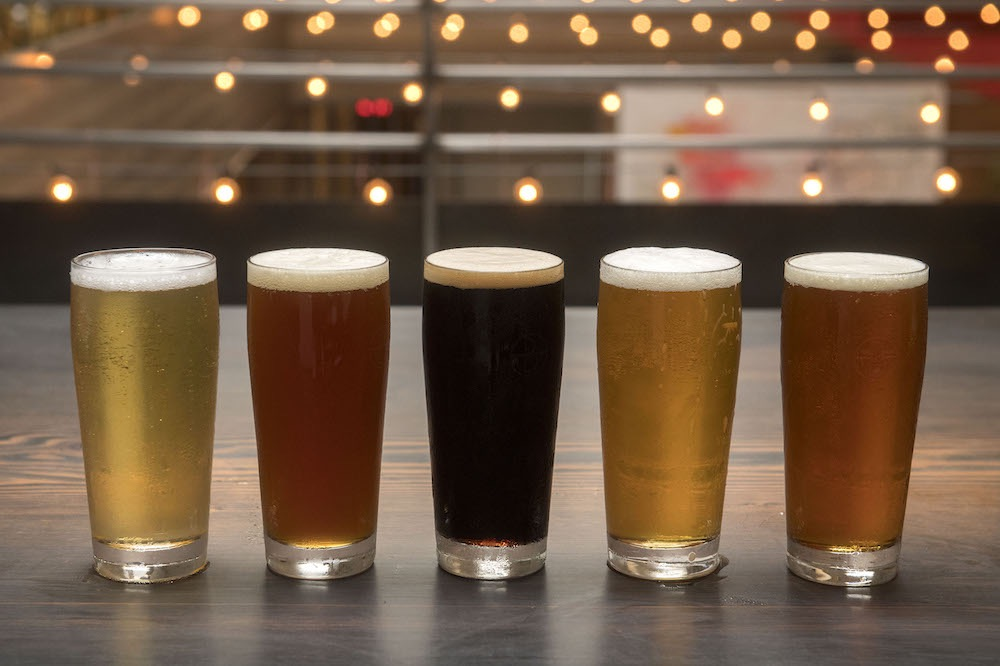

Before we bring in a .csv file we must first import pandas into our code as seen below. We simply write in ‘import pandas as pd’ to bring this package and associated modules into our workspace. You’ll notice that the import line also reads ‘as pd’ which means we are giving pandas an alias name. Whenever you see pd in the code you now know we are referencing pandas (this is a pretty universal way of representing pandas).

To read in the .csv file, we need to assign it a name (we’ll use ‘df’ for data frame) and then use the pandas module ‘read_csv()’. The location of the .csv file goes inside the brackets of the module so pandas knows where to look for the file. If the file was saved on my computer I would just insert the filepath of the .csv. We’re going to also use the pandas module ‘.head()’ on our data frame df to access the first 5 rows of our .csv file and print the output.

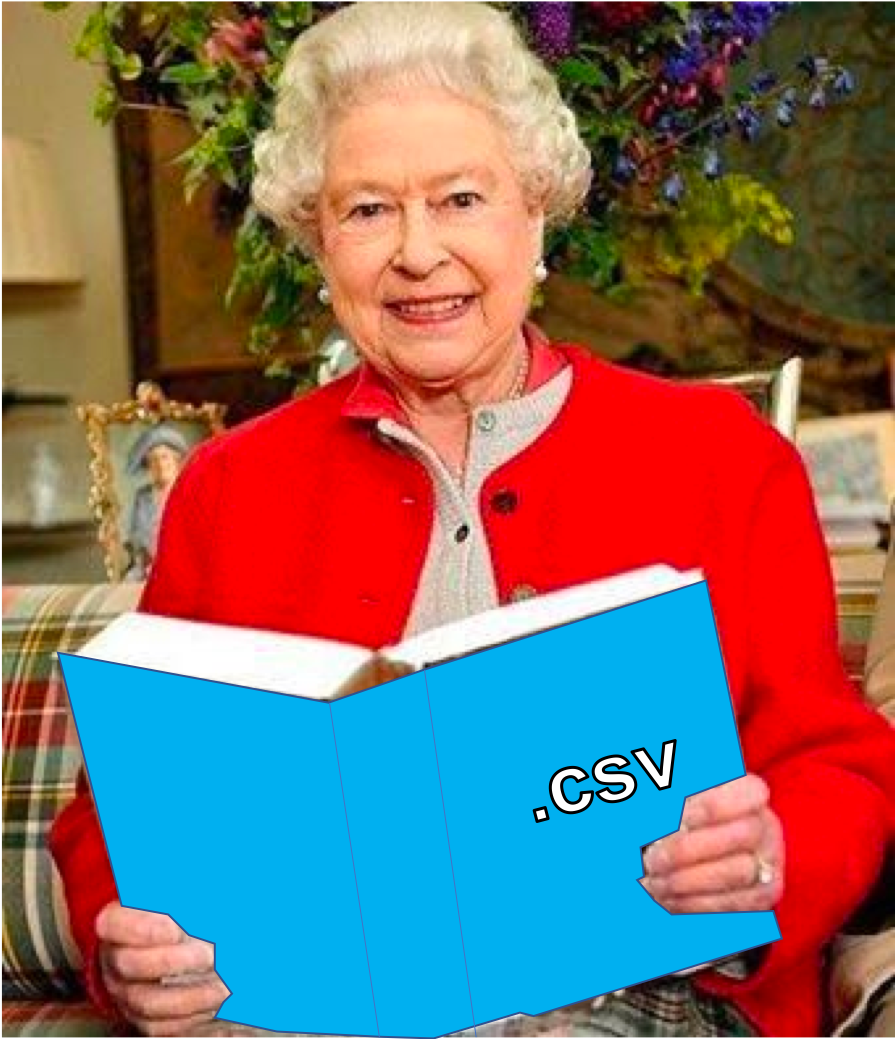

In [1]:
#this first line imports pandas package as alias pd
import pandas as pd

#this next line uses pandas '.read_csv()' module to read file as df
df = pd.read_csv('https://query.data.world/s/zhsp6ytp4wfqkqq3vdp2eo5fq255sk')

#this line prints the first 5 rows in the data frame df
print(df.head())

   brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stou

The output of this code is the first 5 rows of our data frame, confirming that the .csv was read correctly. We can see all the columns here in this view as well but there is a better way to view what data our data frame is comprised off. We can use the modules ‘.shape’ to get the dimensions of our table and ‘.info()’ to get the amount of rows populated for each column and the column data type.

In [2]:
#printing the shape of the dataframe shows us the table dimensions
print(df.shape)

#printing the info of the dataframe shows us the data type and the amount of missing values for each column
print(df.info())

(1586614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB
None


Using the shape module we can see that ‘df’ has 13 columns and 1,586,614 rows, which would make opening and playing with this file in Excel an extremely arduous job. From the ‘info()’ module we can see the data types for each column and the amount of ‘non-null’ values. The columns ‘brewery_name’, ‘review_profilename’ and ‘beer_abv’ seem to be missing some data. In pandas we can drop rows that are missing data by using the ‘.dropna()’ module on the original data frame. Here we’ll assign a new name to this data frame called ‘df_drop’.

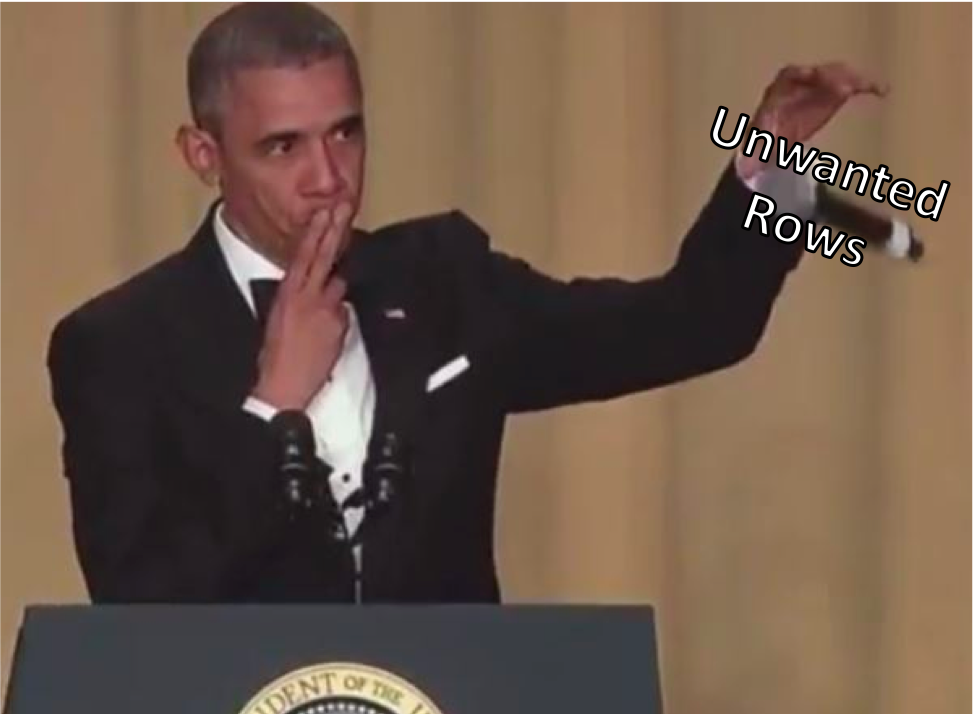

In [3]:
#creating a new data frame called df_drop which has all the row with missing data removed
df_drop=df.dropna()

#printing the info of the new dataframe
print(df_drop.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1518478 non-null int64
brewery_name          1518478 non-null object
review_time           1518478 non-null int64
review_overall        1518478 non-null float64
review_aroma          1518478 non-null float64
review_appearance     1518478 non-null float64
review_profilename    1518478 non-null object
beer_style            1518478 non-null object
review_palate         1518478 non-null float64
review_taste          1518478 non-null float64
beer_name             1518478 non-null object
beer_abv              1518478 non-null float64
beer_beerid           1518478 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 162.2+ MB
None


Looking at the output now we can see that we have dropped our amount of rows from 1,586,614 down to 1,518,478, but at least we now have a fully populated dataset. If you look back at the ‘.head()’ output you should notice that the ‘review_time’ column is made up of long, large numbers with the data type ‘int64’. This is called ‘epoch time’ which is the time in seconds since Jan 1st 1970 so unless you’re really good at dividing by 60 this data is effectively useless for us. However pandas has a way to convert the int64 data type into a ‘DateTime’ datatype.

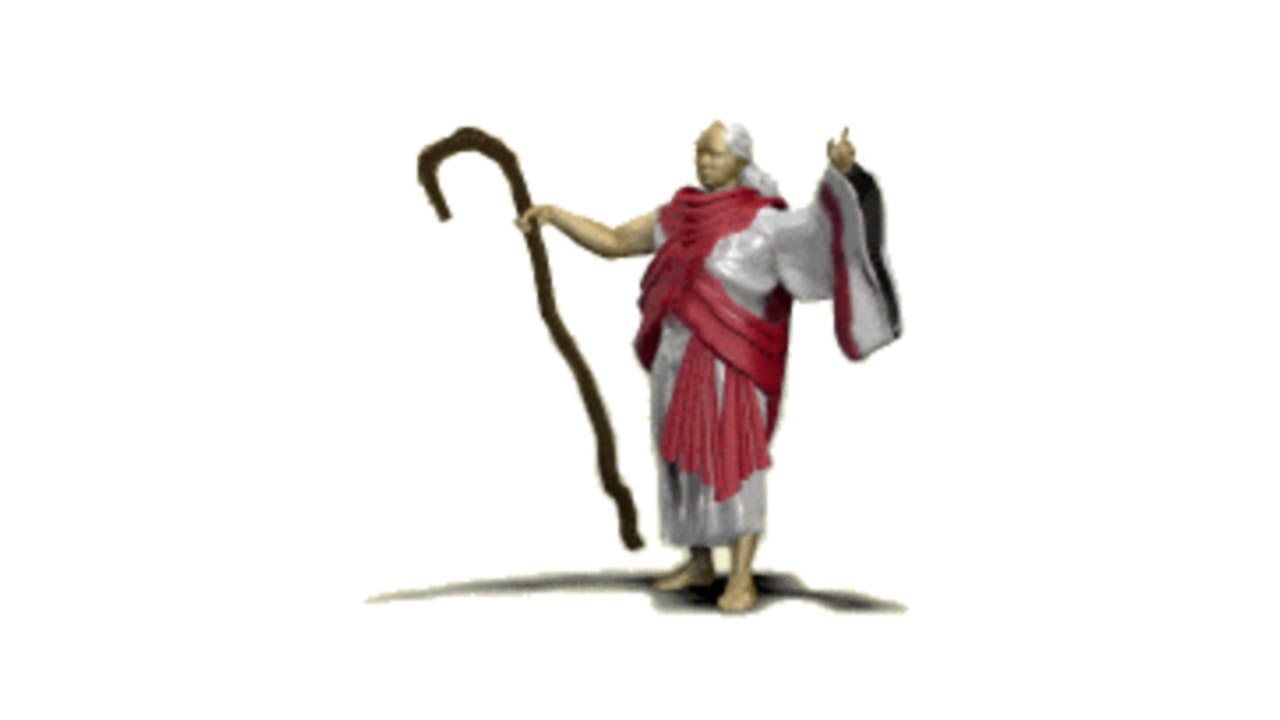

In [4]:
#putting the column name in quotation marks and square brackets directly after the data frame calls out that column 
#only, and using #pd.to_datetime() on our 'review time' column(with units as seconds) we can convert the whole 
#column to datetime
df_drop['review_time']=pd.to_datetime(df_drop['review_time'],unit='s')

#printing out the new and updated data types and the column head
print(df_drop.dtypes)
print(df_drop['review_time'].head())

brewery_id                     int64
brewery_name                  object
review_time           datetime64[ns]
review_overall               float64
review_aroma                 float64
review_appearance            float64
review_profilename            object
beer_style                    object
review_palate                float64
review_taste                 float64
beer_name                     object
beer_abv                     float64
beer_beerid                    int64
dtype: object
0   2009-02-16 20:57:03
1   2009-03-01 13:44:57
2   2009-03-01 14:10:04
3   2009-02-15 19:12:25
4   2010-12-30 18:53:26
Name: review_time, dtype: datetime64[ns]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


The ‘review_time’ column now has readable dates and can easily be understood by anyone. The next thing I wanna do is have a look at what all the different types of beer, or the different categories in the ‘beer_style’ column. To do that we need to call out the column ‘beer_style’ from the data frame and use the ‘.unique()’ module to see the different beers, and the ‘.count_values()’ to see the amount of each different beer. This goes as follows:

In [5]:
#using the .unique() module we can see the unique variables in the column 'beer_style'
print(df_drop['beer_style'].unique())

#using .value_counts() on the column we return how many different variables are in the beer style column
print(df_drop['beer_style'].value_counts())

['Hefeweizen' 'English Strong Ale' 'Foreign / Export Stout'
 'German Pilsener' 'American Double / Imperial IPA' 'Herbed / Spiced Beer'
 'Light Lager' 'Oatmeal Stout' 'American Pale Lager' 'Rauchbier'
 'American Pale Ale (APA)' 'American Porter' 'Belgian Strong Dark Ale'
 'American IPA' 'Russian Imperial Stout' 'American Amber / Red Ale'
 'American Strong Ale' 'Märzen / Oktoberfest' 'American Adjunct Lager'
 'American Blonde Ale' 'Euro Pale Lager' 'English Brown Ale'
 'Fruit / Vegetable Beer' 'Belgian Pale Ale' 'English Bitter'
 'English Porter' 'Irish Dry Stout' 'American Barleywine'
 'American Double / Imperial Stout' 'Doppelbock' 'American Stout'
 'Maibock / Helles Bock' 'Dortmunder / Export Lager' 'Euro Strong Lager'
 'Low Alcohol Beer' 'Extra Special / Strong Bitter (ESB)' 'Bock'
 'English India Pale Ale (IPA)' 'Altbier' 'Kölsch' 'Pumpkin Ale'
 'Rye Beer' 'American Pale Wheat Ale' 'Milk / Sweet Stout' 'Schwarzbier'
 'Munich Dunkel Lager' 'Vienna Lager' 'American Amber / Red Lager'


As we can see there are a large number of beers in here, 104 to be exact! This can be seen at the bottom of the output where ‘Length: 104’. Hmm looking at the list there’s a lot of fancy beers on there and a lot I probably wouldn’t walk out of a bottleo with. The next thing I’m going to do is subset the data frame into two seperate ones. One that contains beers that have the word ‘Ale’ in their name and another that contains the string ‘IPA’ in their name. To select columns on with these attributes I’ll use ‘.str.contains()’.

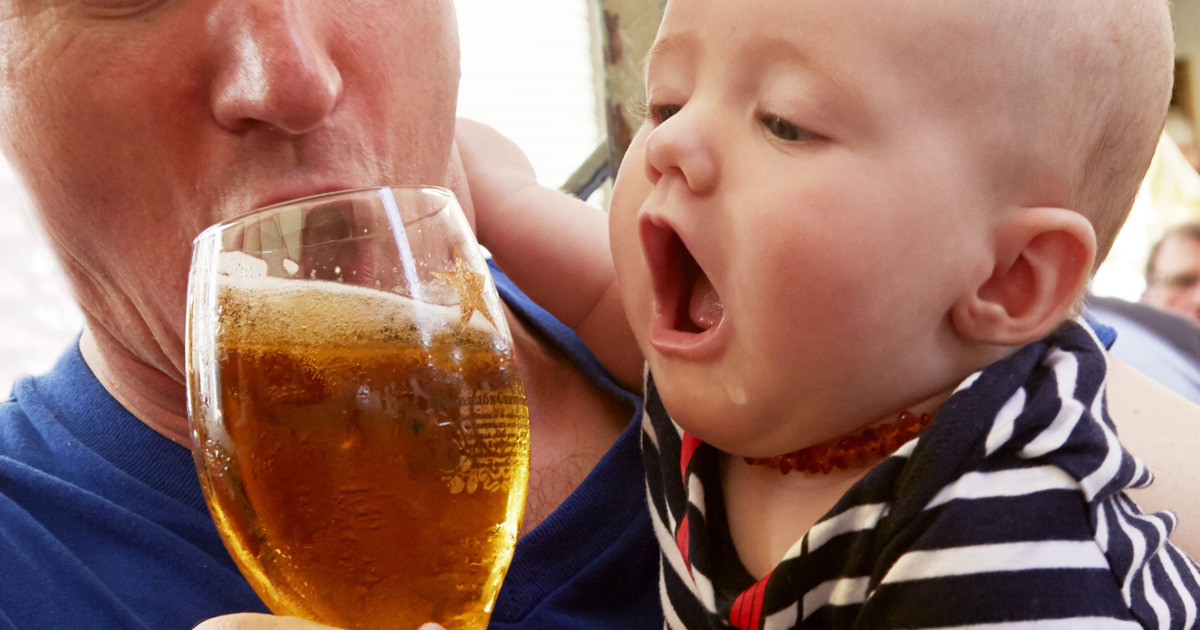

In [6]:
#creating seperate subset data frames from our original data frame
ale = df_drop[df_drop['beer_style'].str.contains('Ale')]
IPA = df_drop[df_drop['beer_style'].str.contains('IPA')]

#printing the info on both new data frames
print(ale.info())
print(IPA.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482420 entries, 1 to 1586613
Data columns (total 13 columns):
brewery_id            482420 non-null int64
brewery_name          482420 non-null object
review_time           482420 non-null datetime64[ns]
review_overall        482420 non-null float64
review_aroma          482420 non-null float64
review_appearance     482420 non-null float64
review_profilename    482420 non-null object
beer_style            482420 non-null object
review_palate         482420 non-null float64
review_taste          482420 non-null float64
beer_name             482420 non-null object
beer_abv              482420 non-null float64
beer_beerid           482420 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 51.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 225825 entries, 4 to 1586599
Data columns (total 13 columns):
brewery_id            225825 non-null int64
brewery_name          225825 non-null object
rev

We now have two seperate data frames that contain all the information for beer types containing the word ‘Ale’ and one for the text ‘IPA’. When we have two data frames we can combine them by using pandas join, merge or concatenate modules. I want to combine them both into one for further analysis. Here I’m going to create a new data frame by concatenating the two, which effectively means I’ll just add the rows of one data frame straight onto the other.

In [7]:
#creating a new data frame titled fav_beer and using pd.concat() to concatenate them
fav_beer = pd.concat([ale, IPA])

#printing the info to see new data frame
print(fav_beer.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708245 entries, 1 to 1586599
Data columns (total 13 columns):
brewery_id            708245 non-null int64
brewery_name          708245 non-null object
review_time           708245 non-null datetime64[ns]
review_overall        708245 non-null float64
review_aroma          708245 non-null float64
review_appearance     708245 non-null float64
review_profilename    708245 non-null object
beer_style            708245 non-null object
review_palate         708245 non-null float64
review_taste          708245 non-null float64
beer_name             708245 non-null object
beer_abv              708245 non-null float64
beer_beerid           708245 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 75.6+ MB
None


We can now see that the rows for both data frame ‘ale’ and ‘IPA’ have been concatenated by their rows, which means I have a new data frame for my favourite beer types. However, there may be some beer types that contained both the text ‘Ale’ and ‘IPA’ in the ‘beer_style’ column. Therefore the rows would have been duplicated in the new data frame. Fortunately we can use pandas to see how many duplicates there are in our data frame and remove them.

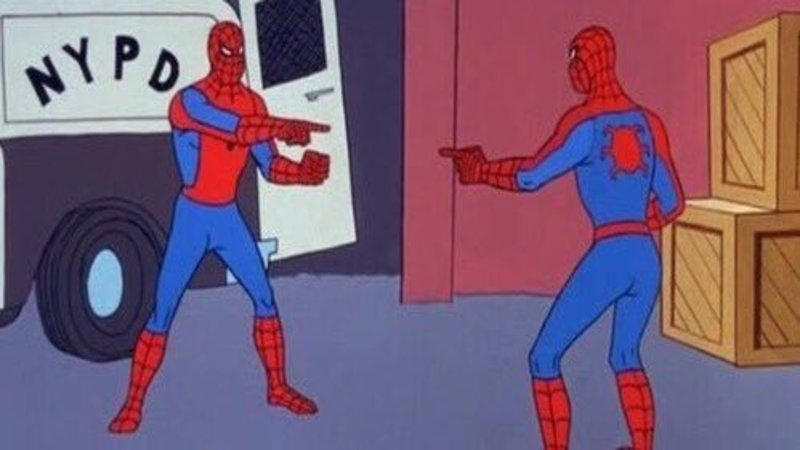

In [8]:
#using .duplicated() returns a Boolean Series (True or False) for our rows, and .value_counts() shows us how 
#many are duplicated
print(fav_beer.duplicated().value_counts())

#create a new data frame and use .drop_duplicates() to remove
fav_beer_clean = fav_beer.drop_duplicates()

#print out the info on the new data frame
print(fav_beer_clean.info())

False    692908
True      15337
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 692908 entries, 1 to 1586599
Data columns (total 13 columns):
brewery_id            692908 non-null int64
brewery_name          692908 non-null object
review_time           692908 non-null datetime64[ns]
review_overall        692908 non-null float64
review_aroma          692908 non-null float64
review_appearance     692908 non-null float64
review_profilename    692908 non-null object
beer_style            692908 non-null object
review_palate         692908 non-null float64
review_taste          692908 non-null float64
beer_name             692908 non-null object
beer_abv              692908 non-null float64
beer_beerid           692908 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 74.0+ MB
None


Here we can see we had 15337 duplicate rows in our data frame ‘fav_beer’. Using ‘.drop_duplicates()’ we have removed them and now have a clean dataset. Now we’ve got a dataset that should cover all the pale ales that were included in the main dataset, but we can refine it a little bit more. Let’s say pigs started to fly and I became picky about my choice of beer. I now only like beers that have been rated 4.5/5.0 or higher, and that have an ABV (alcohol by volume) equal to or between 5.0–6.0%. The code would look like this:

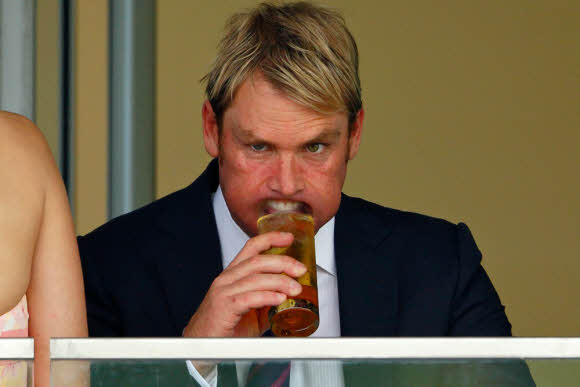

In [9]:
#assigning the same variable just overwrites the values, here we are only selecting the rows that have values 
#equal to or higher than 4.5 in the 'review_overall' columns
fav_beer_clean = fav_beer_clean[fav_beer_clean['review_overall']>=4.5]

#this is similar to above, except this time we are using the 'beer_abv' column and adding a second conditional 
#statement using the '&' symbol
fav_beer_clean = fav_beer_clean[(fav_beer_clean['beer_abv']>=5.0)&(fav_beer_clean['beer_abv']<=6.0)]

#printing the value counts of different beers in the beer_name col
print(fav_beer_clean['beer_name'].value_counts())

Sierra Nevada Pale Ale          1367
60 Minute IPA                   1141
Alpha King Pale Ale              918
Samuel Smith's Nut Brown Ale     604
Anchor Liberty Ale               559
                                ... 
Hammerhead Red Ale                 1
Kimono Girl                        1
Heritage Pale Ale                  1
Wineglass Bay Hazards Ale          1
Tanlines                           1
Name: beer_name, Length: 3121, dtype: int64


You can see after doing this we have decreased our data frame size significantly. We are now only looking at 3121 different types of beer, which is still a lot to taste. I want to shorten my list to only be the 15 most reviewed beers so I know that a lot of people have tried them. To do this I would do as follows:

In [10]:
#putting the number 15 inside the '.head()' module sets the amount of returned rows to 15, as the value_count is 
#in ascending order it returns the top 15 most rated beers
top_15 = fav_beer_clean['beer_name'].value_counts().head(15)

print(top_15)

Sierra Nevada Pale Ale                       1367
60 Minute IPA                                1141
Alpha King Pale Ale                           918
Samuel Smith's Nut Brown Ale                  604
Anchor Liberty Ale                            559
Bell's Oberon Ale                             548
Masala Mama India Pale Ale                    486
Tröegs Hopback Amber Ale                      456
Duchesse De Bourgogne                         419
Fat Tire Amber Ale                            393
Great Lakes Burning River Pale Ale            381
Sierra Nevada Anniversary Ale (2007-2009)     376
Rodenbach Grand Cru                           373
Bender                                        372
Brutal Bitter Ale                             372
Name: beer_name, dtype: int64


This is the final list of the 15 most rated beers that fit the criteria of what I described to pandas. In conclusion we can see that clearly not enough people drink and review Coopers Pale Ale. Regardless, this is an example of how large datasets can be manipulated and analysed using pandas in python. We got a desired outcome without needing too much computing power, which would have been a different story if we had of tried to manipulate and analyse this file in Excel. Time for a pint.

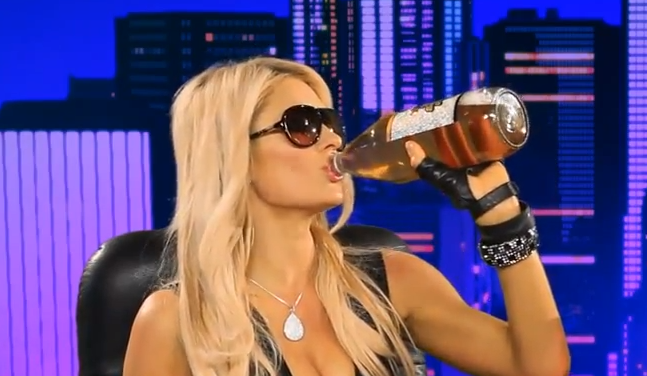